In [1]:

using DrWatson
@quickactivate "HotInverse"
using Shapefile
using Revise
include(srcdir("HotInverse.jl"))#this line will make all the code available

us_data_dir = srcdir("data","rect_data")
geo_info = init_geoinfo(us_data_dir,pop_dir = "/pop_points/pop_points.csv")

#init constraint func
constraint_func = perimeter_constraint
const_val = 10.0
#perform optimization
fitness_over_time,best_ind_over_time,info = sim_anneal(x -> get_fitness(),generate_genome,x -> constraint_func(x,const_val),(x,y,z) -> mutate(x,y,num_inds_to_change = z,remove_fac_prob = 0.1,add_fac_prob = 0.1),geo_info,total_generations = 500,delta_t = 5,genome_length = 1)
best_genome = best_ind_over_time[length(best_ind_over_time)]

loading population data


perturbation dist does not match list of: 'pareto','normal','arcsine','exponential')


MethodError: MethodError: no method matching (::var"#78#81")(::SVector{2, Any}, ::Vector{Point2{Float64}})
Closest candidates are:
  (::var"#78#81")(::Any) at ~/Documents/CSDS/equipartition/HOT_Inverse/HotInverse/scripts/constraint_evulation.ipynb:15

## How does the value of the constraint change over time? Is it respected?

perturbation dist does not match list of: 'pareto','normal','arcsine','exponential')


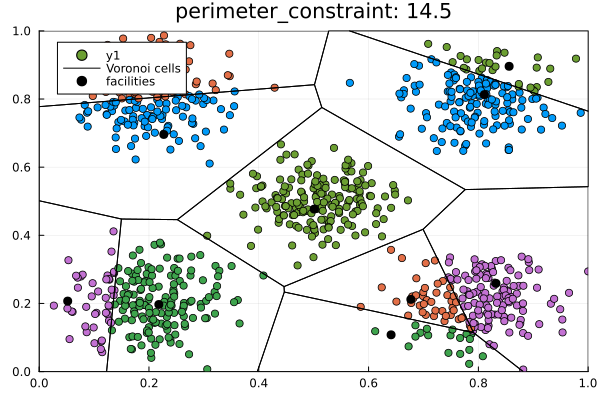

In [2]:
const_val = 14.5 
#perform optimization
fitness_over_time,best_ind_over_time,info = sim_anneal(get_fitness,generate_genome,x -> constraint_func(x,const_val),(x,y,z) -> mutate(x,y,num_inds_to_change = z,remove_fac_prob = 0.1,add_fac_prob = 0.1),geo_info,total_generations = 500,delta_t = 5,genome_length = 1)
best_genome = best_ind_over_time[length(best_ind_over_time)]
#perform optimization
my_plot =  plot_genome(best_genome,geo_info,title = "$(constraint_func): $(const_val)")

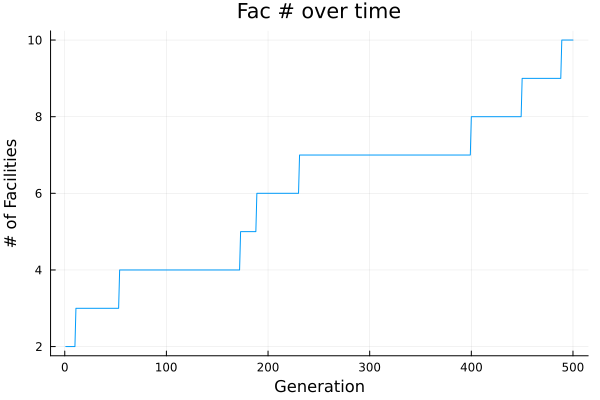

In [3]:
plot(length.(best_ind_over_time),xlabel = "Generation",ylabel = "# of Facilities",title = "Fac # over time",legend = false)

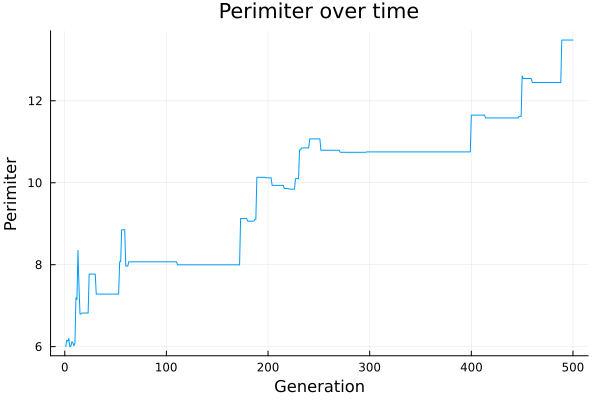

In [4]:
my_ind = best_ind_over_time[1]
best_ind_structs_over_time = map(ind_i -> make_voronoi_individual(ind_i,get_fitness,geo_info.border),best_ind_over_time)
perimiters_over_time = map(ind_i -> sum(ind_i.perimeters),best_ind_structs_over_time)
plot(perimiters_over_time,xlabel = "Generation",ylabel = "Perimiter",title = "Perimiter over time",legend = false)
